In [41]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the data

In [7]:
df=pd.read_csv('drug200.csv')
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [8]:
df.shape

(200, 6)

In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Separate numerical & categorical columns

In [11]:
cat=['Sex', 'BP', 'Cholesterol', 'Drug']
con=['Age',  'Na_to_K']

In [ ]:
Visualization

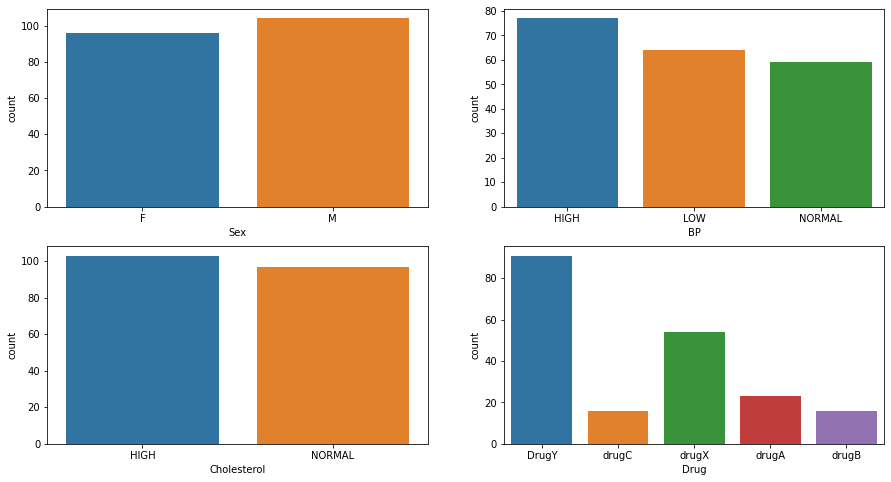

In [12]:
count=1
plt.figure(figsize = (15,8))
for i in cat:
    plt.subplot(2,2,count)
    sns.countplot(x=i,data=df)
    count=count+1
plt.show()

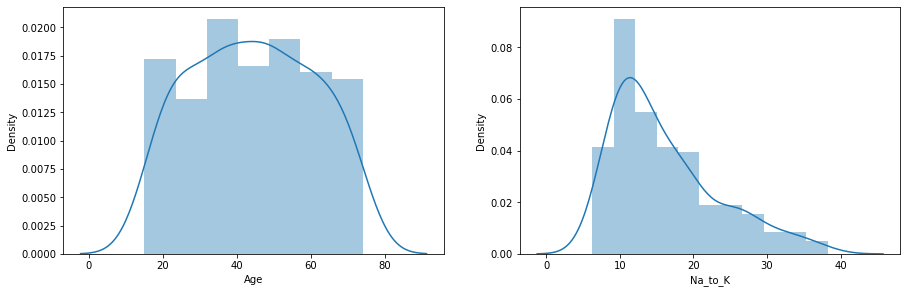

In [15]:
count=1
plt.figure(figsize = (15,10))
for i in con:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
plt.show()

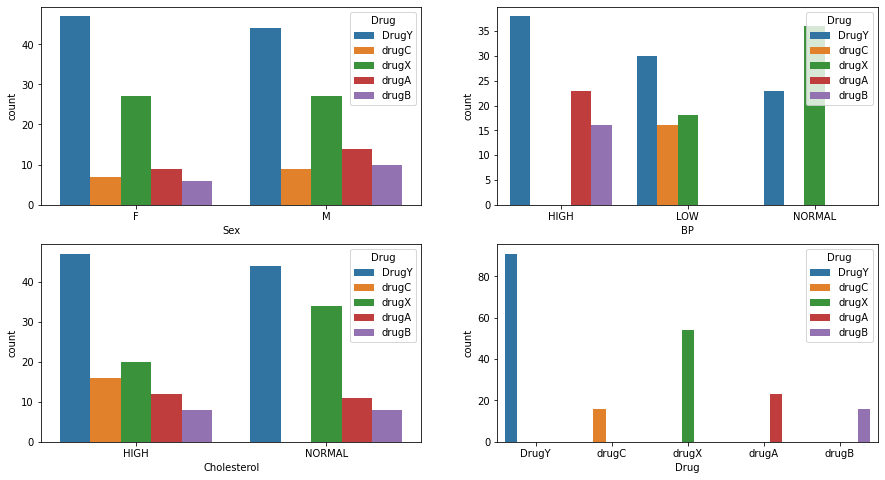

In [16]:
count=1
plt.figure(figsize = (15,8))
for i in cat:
    plt.subplot(2,2,count)
    sns.countplot(x=i,hue="Drug",data=df)
    count+=1
plt.show()

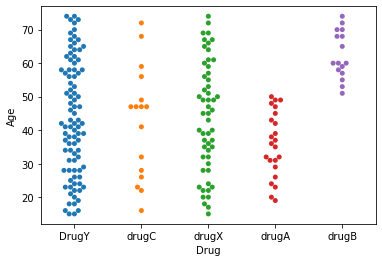

In [17]:
sns.swarmplot(x="Drug",y='Age',data=df)
plt.show()

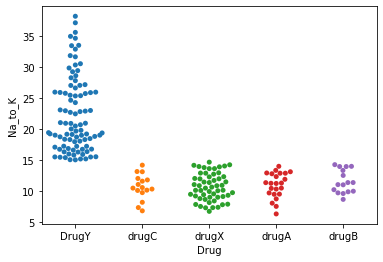

In [18]:
sns.swarmplot(x="Drug",y='Na_to_K',data=df)
plt.show()

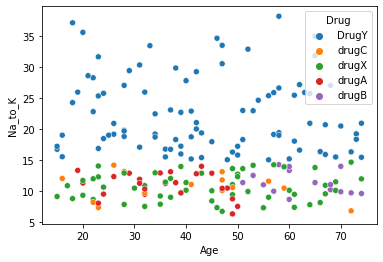

In [19]:
sns.scatterplot(x="Age",y="Na_to_K",hue="Drug",data=df)
plt.show()

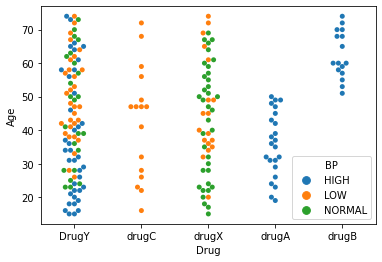

In [20]:
sns.swarmplot(x="Drug",y="Age",hue='BP',data=df)
plt.show()

# Data Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [22]:
encoder=ColumnTransformer([('one',OneHotEncoder(),[1,2,3])],remainder='passthrough')

In [23]:
x1=encoder.fit_transform(df)
x1=pd.DataFrame(x1)
x1.head()

,0,1,2,3,4,5,6,7,8,9
0,1,0,1,0,0,1,0,23,25.355,DrugY
1,0,1,0,1,0,1,0,47,13.093,drugC
2,0,1,0,1,0,1,0,47,10.114,drugC
3,1,0,0,0,1,1,0,28,7.798,drugX
4,1,0,0,1,0,1,0,61,18.043,DrugY


In [24]:
l1=LabelEncoder()

In [26]:
y=l1.fit_transform(df["Drug"])
y=pd.DataFrame(y)
y.head()

,0
0,0
1,3
2,3
3,4
4,0


In [27]:
print(x1.shape)
print(y.shape)

(200, 10)
(200, 1)


In [28]:
x1.drop(9, axis=1, inplace=True)

In [29]:
x1.head()

,0,1,2,3,4,5,6,7,8
0,1,0,1,0,0,1,0,23,25.355
1,0,1,0,1,0,1,0,47,13.093
2,0,1,0,1,0,1,0,47,10.114
3,1,0,0,0,1,1,0,28,7.798
4,1,0,0,1,0,1,0,61,18.043


# Splitting data into train & test

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,test_size=0.3, random_state=100)

In [32]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(140, 9)
(60, 9)
(140, 1)
(60, 1)


# Model Building

In [33]:
from sklearn.neural_network import MLPClassifier
algo=MLPClassifier(hidden_layer_sizes=(60,60),activation='relu',
                  max_iter=2000, random_state=100)

In [34]:
algo.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(60, 60), max_iter=2000, random_state=100)

In [35]:
from sklearn.metrics import accuracy_score
ypred=algo.predict(xtest)

In [ ]:
Evaluation

In [37]:

accuracy_score(ytest,ypred)

0.95

In [38]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(ytest,ypred))

[[31  0  0  0  0]
 [ 0  3  0  0  0]
 [ 1  1  6  0  0]
 [ 0  0  0  5  0]
 [ 1  0  0  0 12]]


In [40]:
from sklearn.metrics import f1_score
print(f1_score(ytest,ypred, average="macro"))

0.9286071428571429
